In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank=pd.read_csv("bank.csv",delimiter=";")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [3]:
bank.shape

(4521, 17)

In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


we have  7 numerical and 10 categorical values

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No null values

In [8]:
bank.duplicated().sum()

0

No duplicate values

In [9]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
churn = bank.copy()

In [11]:
churn.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
churn.drop(["day","month"],axis =1, inplace = True)

In [13]:
for i in churn.columns:
    churn[i] = np.where(churn[i] == "unknown", np.nan, churn[i])

In [14]:
churn.isna().sum()

age             0
job            38
marital         0
education     187
default         0
balance         0
housing         0
loan            0
contact      1324
duration        0
campaign        0
pdays           0
previous        0
poutcome     3705
y               0
dtype: int64

In [15]:
(3705/churn.poutcome.shape[0])*100

81.95089581950896

In [16]:
(1324/churn.contact.shape[0])*100

29.285556292855563

In [17]:
churn.drop("poutcome",axis=1,inplace=True)

In [18]:
churn.drop("contact",axis=1,inplace=True)

In [19]:
churn["job"].fillna(method = "ffill",inplace=True)

In [20]:
churn["education"].fillna(method = "ffill",inplace=True)

In [21]:
varlist = ['default','housing','loan','y']

In [22]:
bank['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [23]:
def binary_map(q):
    return q.map({'yes':1,'no':0})
churn[varlist]=churn[varlist].apply(binary_map)
churn.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30.0,unemployed,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0
1,33.0,services,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,4.0,0
2,35.0,management,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,1.0,0
3,30.0,management,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0
4,59.0,blue-collar,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,0.0,0


In [24]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
churn[list(churn["job"].unique())] = one.fit_transform(churn[["job"]]).A

In [25]:
churn.drop("job",axis = 1, inplace = True)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,services,management,blue-collar,self-employed,technician,entrepreneur,admin.,student,housemaid,retired
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
edu = pd.get_dummies(churn['education'])
edu

,primary,secondary,tertiary
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,0,1
4518,0,1,0
4519,0,1,0


In [27]:
edu=pd.get_dummies(churn['education'],drop_first=True)

In [28]:
status=pd.get_dummies(churn['marital'])
status

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
4516,0,1,0
4517,0,1,0
4518,0,1,0
4519,0,1,0


In [29]:
churn=pd.concat([churn,edu,status],axis=1)
churn

,age,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,30.0,married,primary,0,1787.0,0,0,79.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,33.0,married,secondary,0,4789.0,1,1,220.0,1.0,339.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,35.0,single,tertiary,0,1350.0,1,0,185.0,1.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,30.0,married,tertiary,0,1476.0,1,1,199.0,4.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,59.0,married,secondary,0,0.0,1,0,226.0,1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,married,secondary,0,-333.0,1,0,329.0,5.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
4517,57.0,married,tertiary,1,-3313.0,1,1,153.0,1.0,-1.0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4518,57.0,married,secondary,0,295.0,0,0,151.0,11.0,-1.0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0
4519,28.0,married,secondary,0,1137.0,0,0,129.0,4.0,211.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [30]:
churn.drop("education",axis = 1, inplace = True)

In [31]:
churn.drop("marital",axis = 1, inplace = True)

In [32]:
churn

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,0,-333.0,1,0,329.0,5.0,-1.0,0.0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
4517,57.0,1,-3313.0,1,1,153.0,1.0,-1.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4518,57.0,0,295.0,0,0,151.0,11.0,-1.0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0
4519,28.0,0,1137.0,0,0,129.0,4.0,211.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


In [33]:
churn_c = churn.copy()

In [34]:
churn_c.head(5)

,age,default,balance,housing,loan,duration,campaign,pdays,previous,y,...,entrepreneur,admin.,student,housemaid,retired,secondary,tertiary,divorced,married,single
0,30.0,0,1787.0,0,0,79.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,1,0
1,33.0,0,4789.0,1,1,220.0,1.0,339.0,4.0,0,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,0
2,35.0,0,1350.0,1,0,185.0,1.0,330.0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1
3,30.0,0,1476.0,1,1,199.0,4.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0
4,59.0,0,0.0,1,0,226.0,1.0,-1.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,1,0


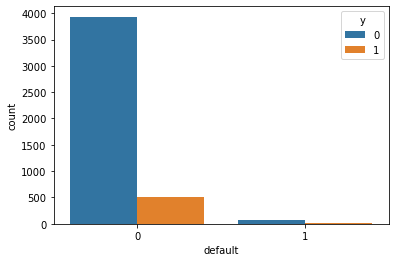

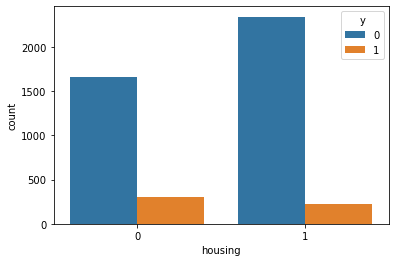

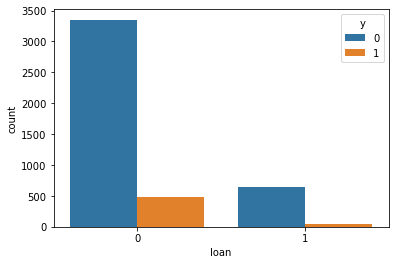

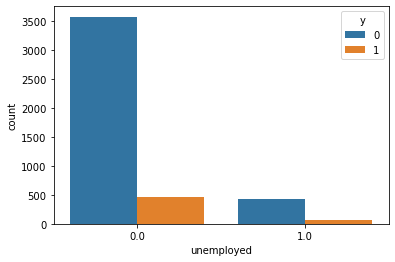

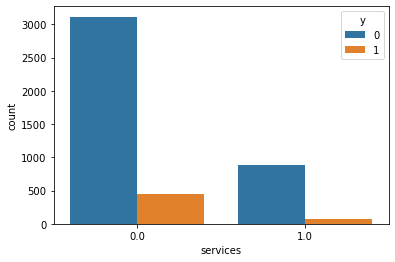

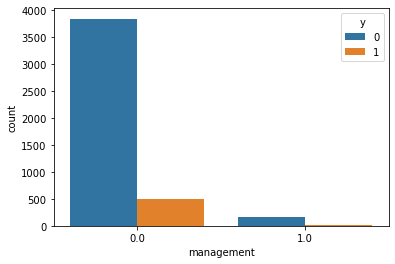

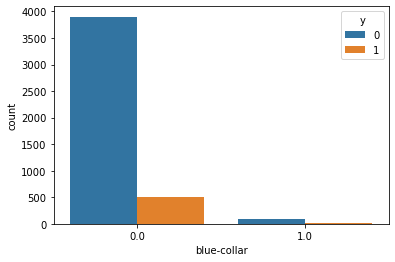

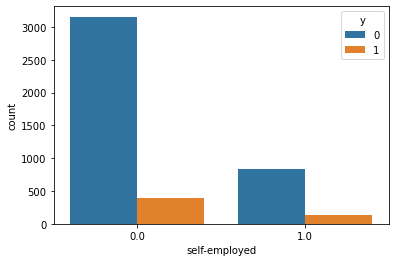

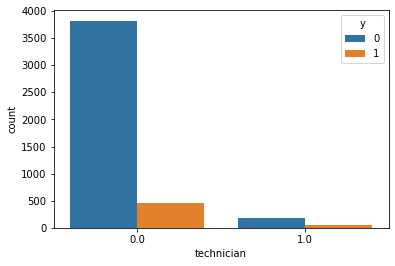

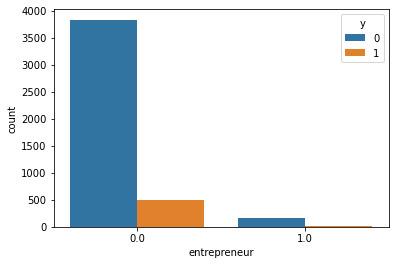

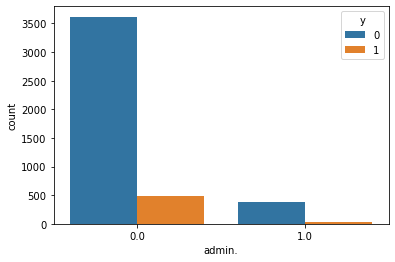

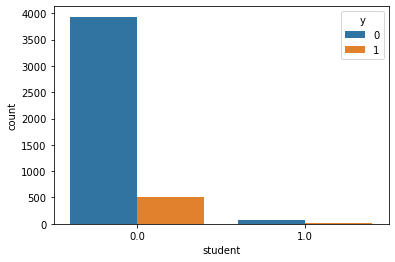

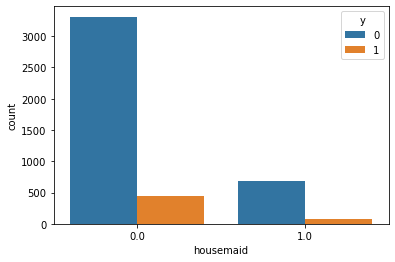

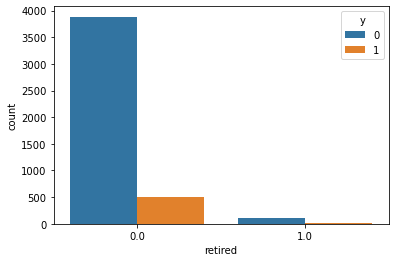

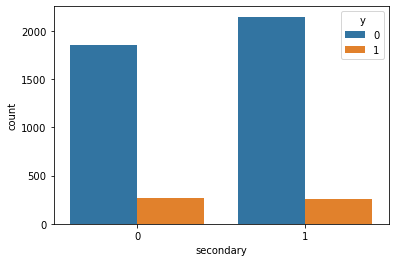

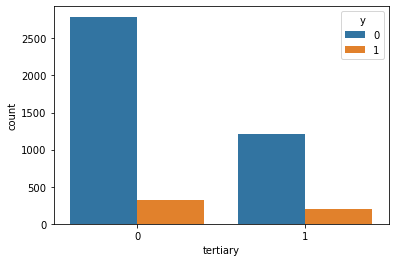

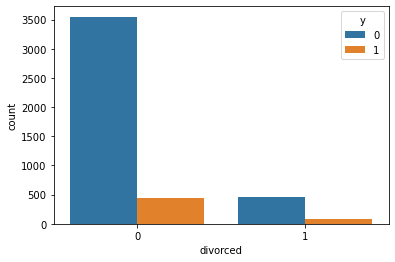

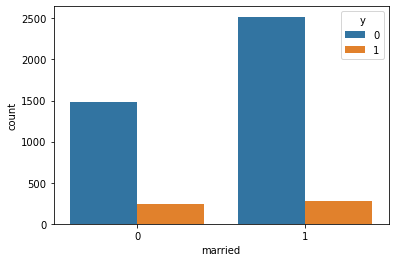

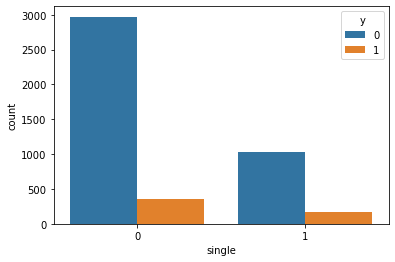

In [35]:
for i,predictor in enumerate(churn_c.drop(columns=['y','age','campaign','previous', 'balance', 'duration','pdays'])):
    plt.figure(i)
    sns.countplot(data=churn_c, x=predictor, hue='y')

<AxesSubplot:>

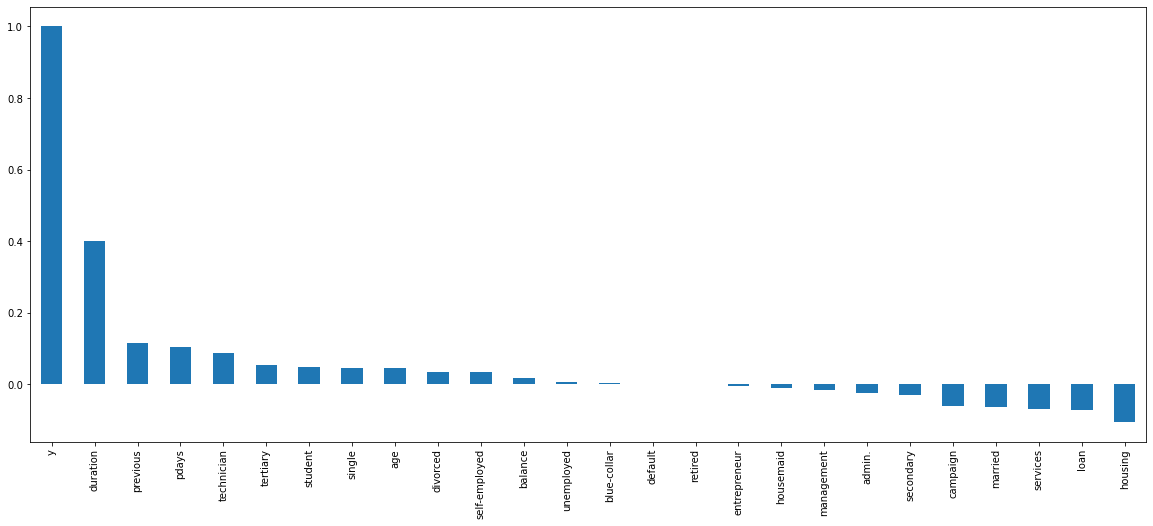

In [36]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
churn_c.corr()['y'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

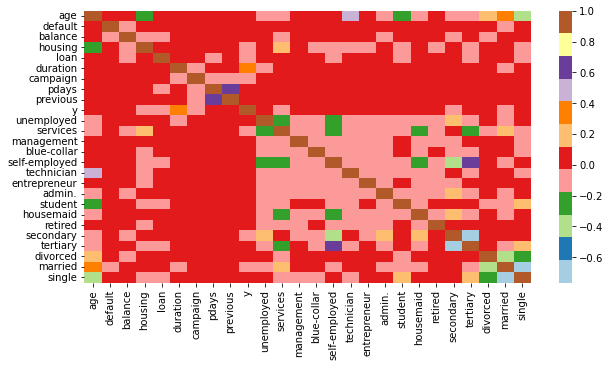

In [37]:
plt.figure(figsize=(10,5))
sns.heatmap(churn_c.corr(),cmap="Paired")

In [38]:
churn_c.to_csv("Churn.csv")